<a href="https://colab.research.google.com/github/youngmantis/Computional-Drug-Discovery/blob/main/Alkaline_phosphatase_tissue_nonspecific_Regression_Models_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparing Linear and Deep Neural Network Regression Models to Predict the Bioactivity data of Alkaline phosphatase tissue-nonspecific inhibitors.

###**INTRODUCTION**

Alkaline phosphatase, tissue-nonspecific (ALPL), is an enzyme encoded by the ALPL gene in humans. This enzyme is a member of the alkaline phosphatase family and is found in various tissues throughout the body, including the liver, bone, kidney, and intestines. Unlike other forms of alkaline phosphatase, the tissue-nonspecific alkaline phosphatase is not limited to a specific tissue type.

Key Features and Functions:

1.  Enzymatic Activity: Alkaline phosphatases are enzymes that catalyze the hydrolysis of phosphate esters in an alkaline environment. They play a crucial role in removing phosphate groups from molecules.

2.  Tissue Distribution: Tissue-nonspecific alkaline phosphatase is found in various tissues, including the liver, bone, kidney, and intestines. Its widespread distribution indicates its involvement in multiple physiological processes.

3.  Bone Mineralization: In bone tissue, tissue-nonspecific alkaline phosphatase is involved in bone mineralization. It plays a role in the regulation of the extracellular matrix during the formation of hydroxyapatite crystals, a key component of bone.

4.  Liver Function: In the liver, tissue-nonspecific alkaline phosphatase is involved in the dephosphorylation of various substrates. Its activity in the liver is an essential part of normal liver function.

5.  Clinical Significance: Measurement of alkaline phosphatase levels in blood tests is a common diagnostic tool. Elevated levels may indicate liver or bone disorders. Tissue-nonspecific alkaline phosphatase contributes to the overall alkaline phosphatase levels in these tests.

6.  Genetic Disorders: Mutations in the ALPL gene can lead to various forms of hypophosphatasia, a rare genetic disorder characterized by defective bone mineralization. Individuals with hypophosphatasia may exhibit skeletal abnormalities, muscle weakness, and dental problems.

7.  Regulation of Phosphate Homeostasis: Tissue-nonspecific alkaline phosphatase, along with other forms of alkaline phosphatase, is involved in regulating phosphate homeostasis in the body. This is crucial for normal bone development and mineralization.

Understanding the role of tissue-nonspecific alkaline phosphatase is important not only for the diagnosis and management of certain genetic disorders but also for comprehending the broader physiological processes related to bone health, liver function, and phosphate metabolism in the body.

###**OBJECTIVES**
In this notebook, the comparison between linear and deep neural network regression models will be undertaken to predict the bioactivity data of tissue-nonspecific alkaline phosphatase (ALPL) inhibitors. The linear regression model will be selected for its simplicity and interpretability, assuming a linear relationship between input features and bioactivity. On the other hand, the deep neural network (DNN) regression model will be employed to capture complex, non-linear patterns in the data through multiple hidden layers, allowing for automatic feature learning.

The evaluation of these models will be done using Mean Squared Error (MSE) metric ensuring a comprehensive assessment of their performance.

Application-wise, both models will be utilized to predict the bioactivity of ALPL inhibitors, leverage molecular descriptors, chemical properties, and structural information as input features. The performance of each model will be closely monitored to gauge their effectiveness in predicting bioactivity compared to actual experimental data.

##Install and import packages

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


##Load bioactivity data

In [ ]:
df = pd.read_csv('/content/Alkaline phosphatase tissue-nonspecific_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.008774
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.301030
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.886057
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.301030
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.356547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.211832
862,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.243364
863,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.339135
864,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.186419


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Columns: 882 entries, PubchemFP0 to pIC50
dtypes: float64(1), int64(881)
memory usage: 5.8 MB


##Split features from labels

Distinguish the target value, also known as the "label," from the features. This label is the value that the model will be trained to predict.

In [ ]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [ ]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_df.pop('pIC50')
test_labels = test_df.pop('pIC50')

##Normalization

Normalizing features with varying scales and ranges is considered a beneficial approach. This is crucial because the model weights are applied to these features, thereby impacting both the output and gradient scales based on the input scale. While a model may still converge without feature normalization, incorporating normalization significantly enhances the stability of the training process.

Please be aware that normalizing the one-hot features in this context doesn't confer any specific benefits; it is being done for the sake of simplicity.

The tf.keras.layers.Normalization, when added to your model, provides a straightforward and neat method for incorporating feature normalization.

Initially, you begin by establishing the layer:

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Next, adjust the preprocessing layer's state to the data by invoking Normalization.adapt.

In [ ]:
normalizer.adapt(np.array(train_features))

Compute the mean and variance, then save them within the layer:

In [ ]:
print(normalizer.mean.numpy())

[[0.999 0.951 0.354 0.014 0.    0.    0.    0.    0.    1.    1.    0.978
  0.488 0.006 0.938 0.824 0.193 0.006 0.931 0.779 0.342 0.03  0.001 0.124
  0.065 0.007 0.    0.    0.    0.    0.    0.    0.    0.567 0.085 0.003
  0.    0.208 0.085 0.009 0.    0.    0.    0.042 0.    0.    0.003 0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.001 0.001 0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.001 0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.661
  0.009 0.606 0.654 0.003 0.01  0.01  0.128 0.    0.074 0.117 0.    0.
  0.    0.012 0.    0.    0.01  0.    0.    0.    0.001 0.    0. 

When the layer is invoked, it provides the input data with individual features normalized.

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.

#Linear regression

 Use linear regression to make predictions based on multiple inputs. This model will apply a linear transformation of *y = mx + b* where *m* is a matrix and *b* is a vector.

Build a Keras Sequential model with two steps, where the initial layer is the normalizer (tf.keras.layers.Normalization(axis=-1)) that you previously defined and adjusted for the entire dataset:

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you invoke Model.predict with a batch of inputs, it generates single-unit outputs for each example:

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 1s 533ms/step


array([[ 0.267],
       [ 0.228],
       [-0.411],
       [-1.698],
       [ 0.646],
       [-1.407],
       [ 1.853],
       [ 0.192],
       [ 0.996],
       [ 1.044]], dtype=float32)

When you invoke the model, it will construct its weight matrices. Ensure you inspect that the kernel weights (the *m* in  *y =mx + b*) have a shape of (882, 1):

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(882, 1) dtype=float32, numpy=
array([[ 0.004],
       [ 0.068],
       [-0.037],
       [-0.019],
       [ 0.071],
       [ 0.082],
       [-0.071],
       [-0.007],
       [-0.079],
       [-0.08 ],
       [-0.037],
       [ 0.053],
       [-0.056],
       [ 0.035],
       [ 0.071],
       [-0.04 ],
       [ 0.01 ],
       [-0.018],
       [-0.058],
       [-0.064],
       [ 0.043],
       [-0.007],
       [-0.007],
       [ 0.017],
       [ 0.038],
       [-0.064],
       [-0.082],
       [-0.026],
       [ 0.043],
       [ 0.063],
       [ 0.046],
       [-0.057],
       [ 0.035],
       [-0.072],
       [-0.012],
       [ 0.035],
       [ 0.059],
       [-0.016],
       [-0.034],
       [ 0.067],
       [ 0.057],
       [ 0.077],
       [-0.031],
       [ 0.081],
       [ 0.065],
       [-0.061],
       [-0.053],
       [-0.058],
       [ 0.071],
       [ 0.048],
       [ 0.03 ],
       [-0.053],
       [ 0.056],
       [-0.029],
       [-0.005]

Set up the model using Keras Model.compile and train it using Model.fit for 1000 epochs:

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.MeanAbsoluteError())

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 1min 14s, sys: 3.18 s, total: 1min 18s
Wall time: 1min 29s


Use the data stored in the history object to create a visualization of the model's training progress:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
995,4.628874,7.169246,995
996,4.741893,6.618815,996
997,4.415829,6.064630,997
998,4.576928,6.452307,998
999,4.008668,6.808619,999


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [pIC50]')
  plt.legend()
  plt.grid(True)

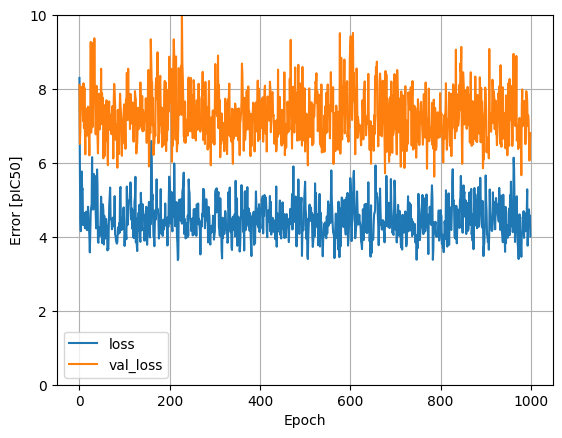

In [ ]:
plot_loss(history)

Collect the results from the test set for future reference

In [ ]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
test_results['linear_model']

807.697998046875

##Regression with a deep neural network (DNN)

In the previous section, a linear model for multiple inputs was implemented.

Here, multiple-input DNN models will be implemented.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:
*   The normalization layer, as before (normalizer for a multiple-input model).
*  Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
*   A linear Dense single-output layer.








In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_train_model = build_and_compile_model(normalizer)

This model possesses a considerably higher number of trainable parameters compared to the linear model.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 882)               1765      
 on)                                                             
                                                                 
 dense_4 (Dense)             (None, 64)                56512     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 62502 (244.15 KB)
Trainable params: 60737 (237.25 KB)
Non-trainable params: 1765 (6.90 KB)
_________________________________________________________________


Train the model with Keras Model.fit:

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=1000)

CPU times: user 1min 38s, sys: 4.59 s, total: 1min 43s
Wall time: 2min 22s


This model does slightly better than the linear model.

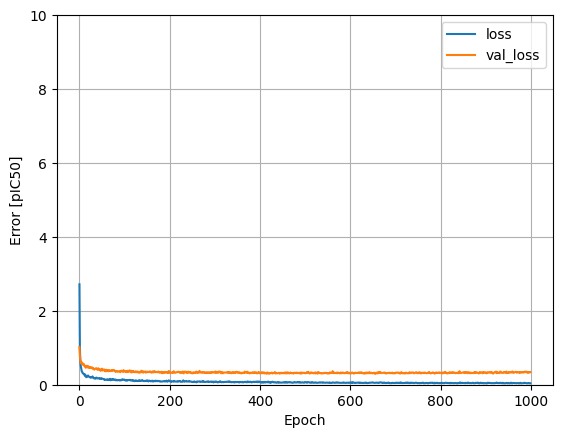

In [ ]:
plot_loss(history)

Collect the results from the test set for future reference

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [pIC50]']).T

,Mean absolute error [pIC50]
linear_model,807.697998
dnn_model,1775.340454


##Make predictions
You can now make predictions with the dnn_model on the test set using Keras Model.predict and review the loss:

6/6 [==============================] - 0s 3ms/step


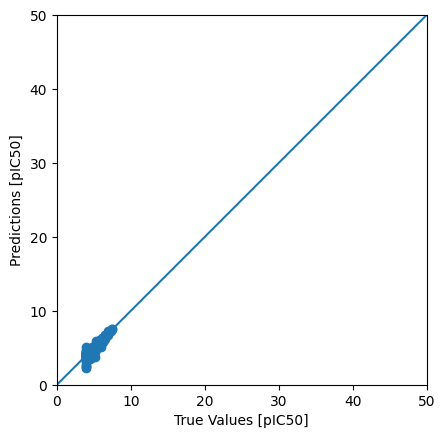

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pIC50]')
plt.ylabel('Predictions [pIC50]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It seems that the model provides a fairly accurate prediction.

Now, let's examine the distribution of errors:

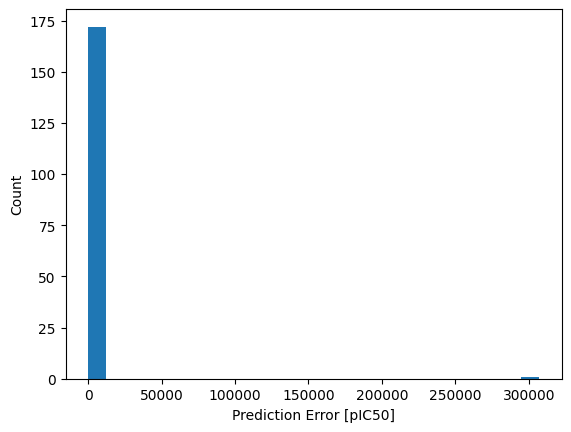

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [pIC50]')
_ = plt.ylabel('Count')

If you're satisfied with the model, keep it for future use by utilizing Model.save:

In [ ]:
dnn_model.save('dnn_model.keras')